In [1]:
%pip install -q matplotlib sympy numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Python ranges and conditionals

In [3]:
range(1, 3)   # like matlab [1:2]
range(1, 5+1, 2)   # like matlab [1:2:5]

range(1, 6, 2)

In [4]:
a = 2
if a > 3:
    print('hello')
elif a == 2:
    print('a ==2')
else:
    print('stuff')

a ==2


## Computer approximations $p_n$

In [5]:
t = np.linspace(0, 2* np.pi, 1000)
a0 = 0
approx = a0*1
n = 100
# note to get n, you need to use range k+1
for k in range(1, n+1, 2):
    approx = approx + (4/np.pi)*np.sin(k*t)/k

Text(0.5, 0, 't')

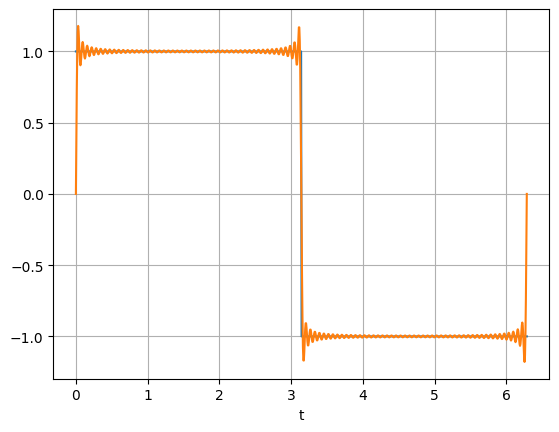

In [6]:
f = np.where(t > np.pi, -1, 1)

plt.plot(t, f)
plt.plot(t, approx)
plt.grid(True)
plt.xlabel('t')

## Power Spectrum

In [7]:
ak_list = []
n = 5
k_list = range(-n, n+1)
    
for k in k_list:
    if k == 0:
        ak_list.append(0)
    elif k % 2 == 0:  #even
        ak_list.append(0)
    else:  # odd and non-zero
        ak_list.append(2*1j/(np.pi*k))

# turn list into 
ak_list = np.array(ak_list)

In [8]:
list(k_list)

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

In [9]:
ak_list

array([-0.-0.12732395j,  0.+0.j        , -0.-0.21220659j,  0.+0.j        ,
       -0.-0.63661977j,  0.+0.j        ,  0.+0.63661977j,  0.+0.j        ,
        0.+0.21220659j,  0.+0.j        ,  0.+0.12732395j])

In [10]:
np.sqrt(1 - np.sum(np.abs(ak_list)**2))

np.float64(0.25873630929385416)

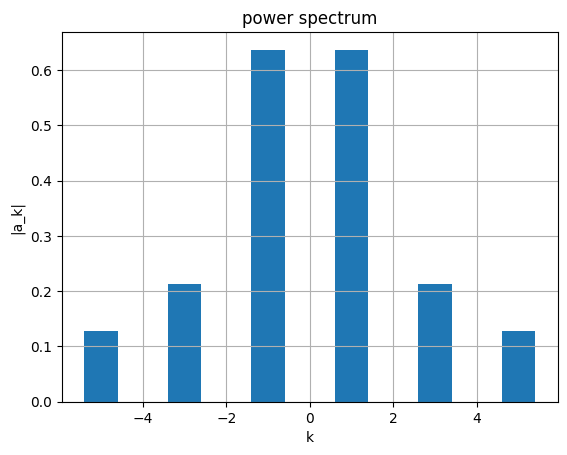

In [11]:
power = np.abs(ak_list)**2
plt.bar(k_list, np.abs(ak_list))
plt.xlabel('k')
plt.ylabel('|a_k|')
plt.title('power spectrum')
plt.grid()

## Computing || f - p_n ||^2

In [12]:
norm_f_sq = 1

norm_error_sq = norm_f_sq
n = 3
for k in range(-n, n+1):  # always range uses n+1
    if k == 0: # a0
        ak = 0
    elif k%2 != 0: # odd terms
        ak = 2*1j/(np.pi*k)
    elif k%2 == 0: # even
        ak = 0
    # same as: norm_error_sq = norm_error_sq - abs(ak)**2
    norm_error_sq -= abs(ak)**2

print('should converge to zero as n approaches infinity')
normf = np.sin(2*t)
norm_error_sq

should converge to zero as n approaches infinity


0.09936725651255297

# Example

In [13]:
norm_f_sq = 1/3

norm_error_sq = norm_f_sq
n  = 5
for k in range(-n, n+1):
    if k == 0:
        ak = 1/2
    elif k %2 == 0:
        ak = 0
    else:
        ak = -2/(k**2*np.pi**2)
    norm_error_sq -= abs(ak)**2

norm_error_sq

6.014654969650223e-05

In [14]:
error_sq = 1/3 - 1/4  # ||f||^2 - |a0|^2
for k in range(-n, n+1):
    if k != 0 and k % 2 == 1:  # k non zeros and k odd
        error_sq -= (4/(k**4*np.pi**4))  # |ak|^2
error_sq

6.014654969650212e-05

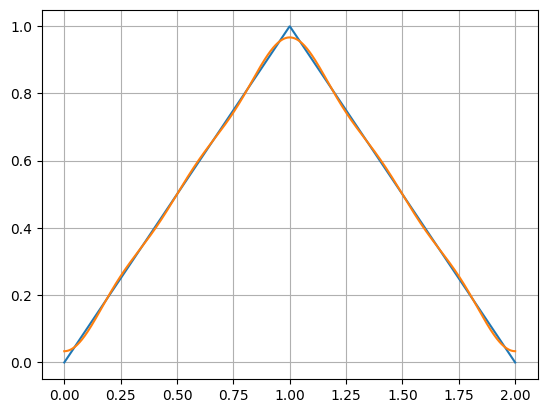

In [15]:
t = np.linspace(0, 2, 1000)
f = np.where(t < 1, t, 2 - t)
plt.plot(t, f)

pn = 1/2

for k in range(1, n+1, 2):
    pn -= (4/(np.pi**2))*np.cos(k*np.pi*t)/k**2
    
plt.plot(t, pn)
plt.grid()

In [16]:
from pylab import *
f_norm_sq = pi**2/3
a0 = pi/2
pn_norm_sq = 0
n = 10
for k in range(-n, n+1):
    if k == 0:
        ak = a0
    elif k %2 == 1:
        ak = -2/(pi*k**2)
    else:
        ak = 0
    pn_norm_sq += abs(ak)**2

error_norm = sqrt(f_norm_sq - pn_norm_sq)
print('error', error_norm)

error 0.011510102164236985


In [17]:
import sympy

In [18]:
import sympy
import numpy as np

import matplotlib.pyplot as plt

def L2_inner_product(f, g, tau):
    # you can define t here to not rely on a global definition
    t = sympy.symbols('t', real=True)
    return (sympy.integrate(f*sympy.conjugate(g), (t, 0, tau))/tau).simplify()

def L2_norm(f, tau):
    return sympy.sqrt(L2_inner_product(f, f, tau))

def L2_coefficient(f, g, tau):
    return (L2_inner_product(f, g, tau)/L2_norm(g, tau)**2).simplify()

def approx(f, tau, n):
    w0 = 2*sympy.pi/tau
    k = sympy.symbols('k', real=True, integer=True)
    psi_k = sympy.exp(-sympy.I*k*w0*t)
    ak = L2_coefficient(f, psi_k, 2*sympy.pi)
    approx = 0
    for k_i in range(-n, n+1):
        approx += (ak*psi_k).subs(k, k_i)

    e = (f - approx).simplify()

    sympy.plot(f, approx, (t, 0, tau))

    sympy.plot(e, (t, 0, tau), label='error', legend=True)

    print(n, ': error using integration', sympy.N(L2_norm(e, tau)))

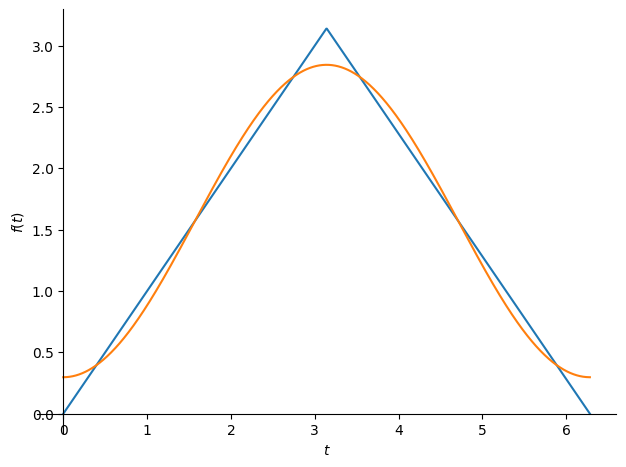

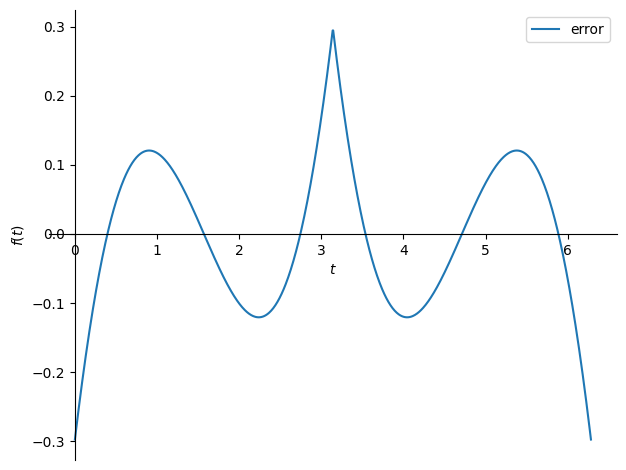

2 : error using integration 0.109075956495513


In [19]:
tau = 2*sympy.pi
t = sympy.symbols('t', real=True)
f = sympy.Piecewise(
    (t, t < sympy.pi),
    (2*sympy.pi - t, t >= sympy.pi)
)
approx(f, tau, 2)

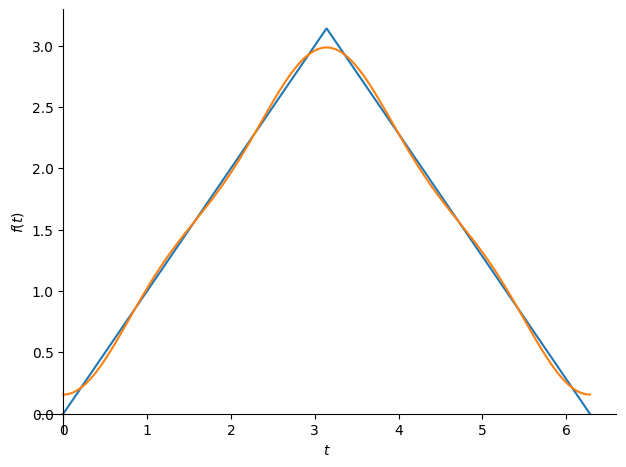

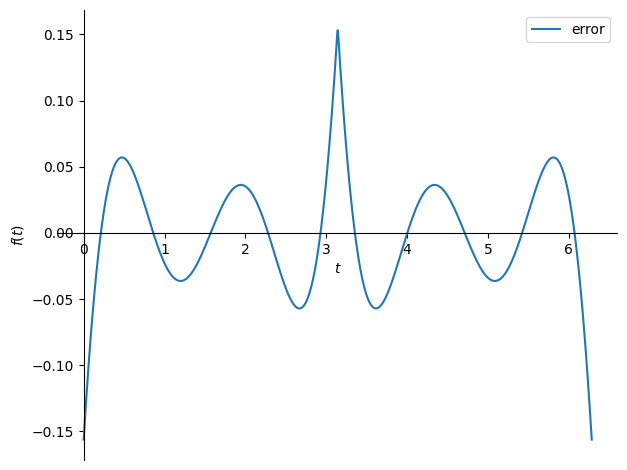

4 : error using integration 0.0434802691139003


In [20]:
approx(f, tau, 4)